In [1]:
# files = "https://github.com/scoutog/Kobe-Bryant-Shot-Selection/raw/master/kobe-shots.zip" 
# !rm -rf * && wget $files && unzip -o kobe-shots.zip

In [2]:
# Load the data here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data_all  = pd.read_csv("data.csv")

data_all.head(3)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


### Make dataframes for made shots, missed shots, shots to be predicted and all shots without the values to be predicted

In [3]:
data_all.shape

(30697, 25)

In [3]:
# data_made=data_all[(data_all['shot_made_flag'] == 1.0)]
# df3 = df[(df['count'] == '2') & (df['price'] == '100')]
# df.loc[df['Symbol'] == 'A99']

data_made = data_all.loc[data_all['shot_made_flag'] == 1]
data_miss = data_all.loc[data_all['shot_made_flag'] == 0]
data_predict = data_all[pd.isnull(data_all['shot_made_flag'])]
data_dropna =  data_all[pd.notnull(data_all['shot_made_flag'])]

print(data_made.shape, data_miss.shape, data_predict.shape, data_all.shape)
print(11465+14232+5000)
print(data_dropna.shape)

(11465, 25) (14232, 25) (5000, 25) (30697, 25)
30697
(25697, 25)


### Understanding lat, lon, loc_x, loc_y

Text(0.5, 1.0, 'lat and lon for made shots')

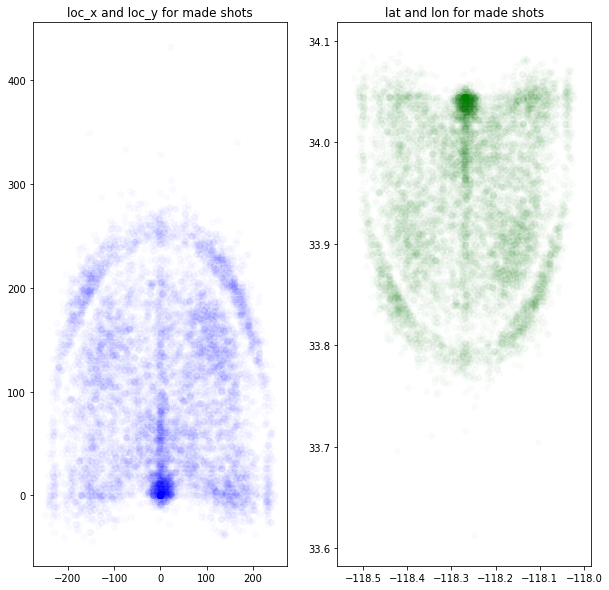

In [4]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y made shots
plt.subplot(121)
plt.scatter(data_made.loc_x, data_made.loc_y, color='blue', alpha=.02)
plt.title('loc_x and loc_y for made shots')

# lat and lon made shots
plt.subplot(122)
plt.scatter(data_made.lon, data_made.lat, color='green', alpha=.02)
plt.title('lat and lon for made shots')

Text(0.5, 1.0, 'lat and lon for missed shots')

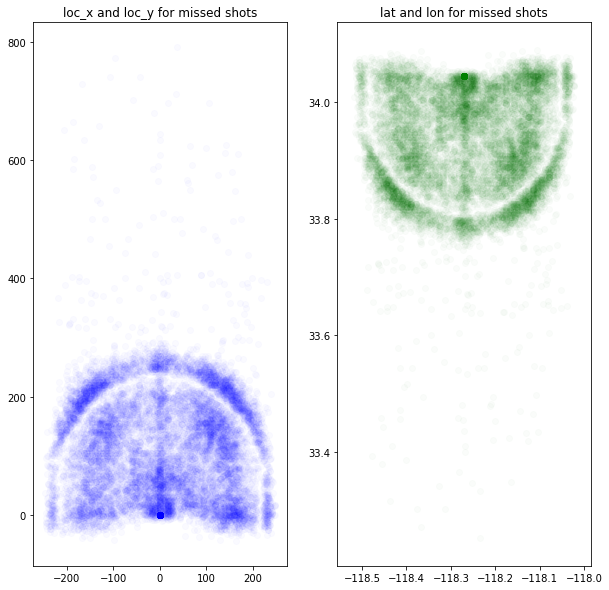

In [5]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y missed shots
plt.subplot(121)
plt.scatter(data_miss.loc_x, data_miss.loc_y, color='blue', alpha=.02)
plt.title('loc_x and loc_y for missed shots')

# lat and lon missed shots
plt.subplot(122)
plt.scatter(data_miss.lon, data_miss.lat, color='green', alpha=.02)
plt.title('lat and lon for missed shots')

Text(0.5, 1.0, 'lat and lon for shots to predict')

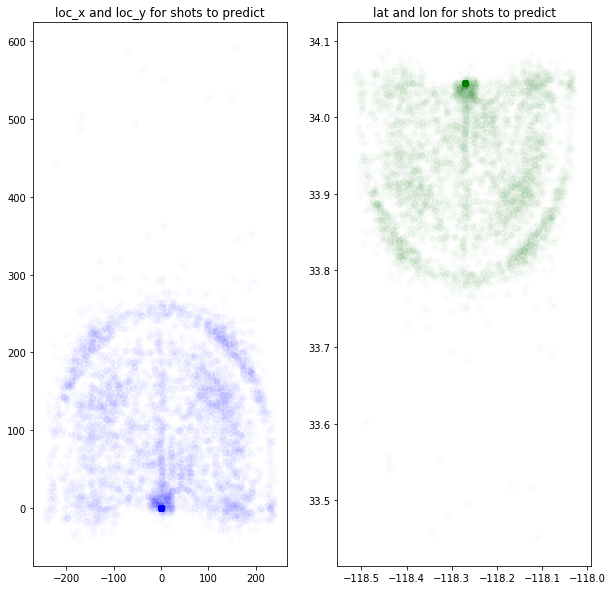

In [6]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y shots to predict
plt.subplot(121)
plt.scatter(data_predict.loc_x, data_predict.loc_y, color='blue', alpha=.02)
plt.title('loc_x and loc_y for shots to predict')

# lat and lon shot to predict
plt.subplot(122)
plt.scatter(data_predict.lon, data_predict.lat, color='green', alpha=.02)
plt.title('lat and lon for shots to predict')

### Turning lat, lon, loc_x, and loc_y into polar coordinates

In [7]:
data_all['dist'] = np.sqrt(data_all['loc_x']**2 + data_all['loc_y']**2)
loc_x_zero=data_all['loc_x'] == 0

data_all['angle'] = np.array([0]*len(data_all))
data_all['angle'][~loc_x_zero] = np.arctan(data_all['loc_y'][~loc_x_zero] / data_all['loc_x'][~loc_x_zero])
data_all['angle'][loc_x_zero] = np.pi / 2 

C:\Users\scout\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\scout\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'polar coordinates')

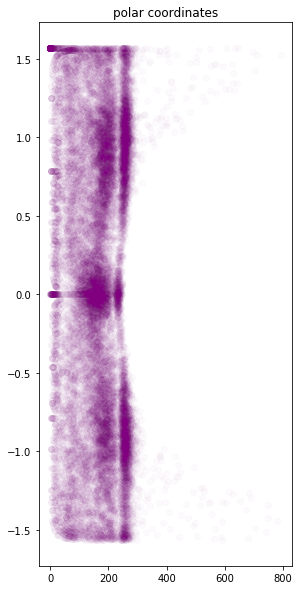

In [8]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(data_all.dist, data_all.angle, color='purple', alpha=.02)
plt.title('polar coordinates')

In [9]:
data_all.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'dist', 'angle'],
      dtype='object')

In [10]:
print(data_all.shot_id.unique())

#DROP: action_type (too much), game_event_id, game_id, team_id, team_name, game_date
#     matchup, shot_id

#KEEP: combined_shot_type (dummy), playoffs, season, shot_type (2 or 3), shot_zone_area (dummy), shot_zone_basic (dummy)
#       shot_zone_range (dummy), opponent, dist, angle

#MODIFY: lat, lon, loc_x, loc_y
#         minutes_remaining and seconds_remaining into time remaining

# EXPLORE: shot_distance, period, 

[    1     2     3 ... 30695 30696 30697]


In [11]:
data_all['remaining_time'] = data_all['minutes_remaining'] * 60 + data_all['seconds_remaining']

### Period ranges 1-7 which is odd considering there are only 4 quarters. A deeper look tells us that periods 5,6,7 are overtime.

In [12]:
data_all.loc[data_all.period > 4, 'overtime'] = 1 
data_all.loc[data_all.period <= 4, 'overtime'] = 0
print(data_all.overtime.unique())

[0. 1.]


In [13]:
data_all['season'] = data_all['season'].apply(lambda x: int(x.split('-')[0]))
data_all.season.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 1996, 1997, 1998, 1999], dtype=int64)

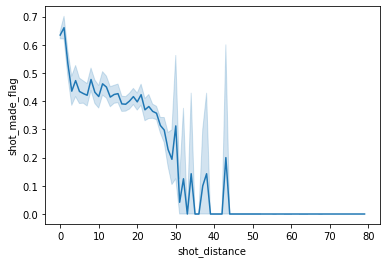

In [14]:
import seaborn as sns

ax = sns.lineplot(x="shot_distance", y="shot_made_flag", data=data_all)

### Columns to drop

In [15]:
drops = ['action_type', 'game_event_id', 'game_id', 'team_id', 'team_name', 
         'game_date', 'matchup', 'shot_id', 'lat', 'lon', 'loc_x', 'loc_y',
         'minutes_remaining', 'seconds_remaining']

for i in drops:
    data_all = data_all.drop(i, 1)

In [16]:
data_all.head(1)

# DUMMY: combined_shot_type, period, playoffs, season, shot_type, shot_zone_area
#         shot_zone_basic, shot_zone_range, opponent, overtime

,combined_shot_type,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,dist,angle,remaining_time,overtime
0,Jump Shot,1,0,2000,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,181.859836,0.407058,627,0.0


### Creating dummy variables

In [17]:
features_data = data_all[['combined_shot_type', 'period', 'playoffs', 'season',
                          'shot_type', 'shot_zone_area', 'shot_zone_basic',
                          'shot_zone_range', 'opponent', 'overtime']]

for i in features_data:
    data_all = pd.concat([data_all, pd.get_dummies(data_all[i], prefix=i)], 1)
    data_all = data_all.drop(i, 1)

In [18]:
data_all.head(1)

,shot_distance,shot_made_flag,dist,angle,remaining_time,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,...,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,overtime_0.0,overtime_1.0
0,18,NaN,181.859836,0.407058,627,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


### Split data

In [19]:
df = data_all[pd.notnull(data_all['shot_made_flag'])]
submission = data_all[pd.isnull(data_all['shot_made_flag'])]
submission = submission.drop('shot_made_flag', 1)

data_train = df.drop('shot_made_flag', 1)
data_train_y = df['shot_made_flag']

In [20]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(data_train, data_train_y, 
                                                    test_size=0.4,
                                                    random_state=100)

### Making a KNN Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

knn_val_y = knn.predict(val_X)
knn_train_y = knn.predict(train_X)

from sklearn.metrics import log_loss

print('train:', log_loss(train_y, knn_train_y))
print('validation:', log_loss(val_y, knn_val_y))

train: 9.870239048019574
validation: 15.261866716346352


### Refining parameters

In [22]:
test_knn = KNeighborsClassifier(n_neighbors=12)
test_knn.fit(train_X, train_y)
 
test_knn_val_y = test_knn.predict(val_X)
print('validation:', log_loss(val_y, test_knn_val_y))

validation: 14.411695870155294


In [23]:
x = 15
n = 1

while n <= 50:
  knn2 = KNeighborsClassifier(n_neighbors=n)
  knn2.fit(train_X, train_y)
  knn2_val_y = knn2.predict(val_X)
  y = log_loss(val_y, knn2_val_y)
  if y < x:
    x = y
    best_n = n 
  n+=1

In [24]:
print(x, best_n)

13.729581154220677 36


In [25]:
best_knn = KNeighborsClassifier(n_neighbors=best_n)
best_knn.fit(train_X, train_y)

best_knn_val_y = knn.predict(val_X)
best_knn_train_y = knn.predict(train_X)

from sklearn.metrics import log_loss

print('train:', log_loss(train_y, best_knn_train_y))
print('validation:', log_loss(val_y, best_knn_val_y))

train: 9.870239048019574
validation: 15.261866716346352


### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

best_knn_con_val = confusion_matrix(val_y,best_knn_val_y)
print('val ConMat: ',best_knn_con_val)

best_knn_con_train = confusion_matrix(train_y,best_knn_train_y)
print('train ConMat: ',best_knn_con_train)

val ConMat:  [[3676 2008]
 [2534 2061]]
train ConMat:  [[6676 1872]
 [2534 4336]]


### Submitting

In [27]:
best_knn.fit(data_train, data_train_y)
pred = best_knn.predict_proba(submission)

sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("knn_submission.csv", index=False)

### Making the Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(train_X, train_y)

lr_val_y = lr.predict(val_X)
lr_train_y = lr.predict(train_X)

from sklearn.metrics import log_loss
print('train:', log_loss(train_y, lr_train_y))
print('validation:', log_loss(val_y, lr_val_y))

C:\Users\scout\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train: 13.376060067466865
validation: 13.329703668369222


### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

lr_con_val = confusion_matrix(val_y, lr_val_y)
print('val ConMat: ', lr_con_val)

lr_con_train = confusion_matrix(train_y, lr_train_y)
print('train ConMat: ', lr_con_train)

val ConMat:  [[4811  873]
 [3094 1501]]
train ConMat:  [[7222 1326]
 [4645 2225]]


### Submission

In [30]:
lr.fit(data_train, data_train_y)
pred = lr.predict_proba(submission)

sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("LR_submission.csv", index=False)

C:\Users\scout\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestClassifier
a = 15
m = 1

while m <= 50:
  rf = RandomForestClassifier(n_estimators=m)
  rf.fit(train_X, train_y)
  rf_val_y = rf.predict(val_X)
  y = log_loss(val_y, rf_val_y)
  if y < a:
    a = y
    best_m = m 
  m+=1

In [32]:
print(a, best_m)

14.102572543662733 40


In [33]:
best_rf = RandomForestClassifier(n_estimators=best_m)
best_rf.fit(train_X, train_y)

best_rf_val_y = best_rf.predict(val_X)
best_rf_train_y = best_rf.predict(train_X)

from sklearn.metrics import log_loss

print('train:', log_loss(train_y, best_rf_train_y))
print('validation:', log_loss(val_y, best_rf_val_y))

train: 0.02016169318597499
validation: 14.34114605294353


### Confusion Matrix

In [34]:
best_rf_con_val = confusion_matrix(val_y,best_rf_val_y)
print('val ConMat: ',best_rf_con_val)

best_rf_con_train = confusion_matrix(train_y,best_rf_train_y)
print('train ConMat: ',best_rf_con_train)

val ConMat:  [[4255 1429]
 [2839 1756]]
train ConMat:  [[8543    5]
 [   4 6866]]


### Submission

In [35]:
best_rf.fit(data_train, data_train_y)
pred = best_rf.predict_proba(submission)

sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("rf_submission.csv", index=False)

### Extra Trees Classifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

g = 15
f = 1

while f <= 50:
  trees = ExtraTreesClassifier(n_estimators=f)
  trees.fit(train_X, train_y)
  trees_val_y = trees.predict(val_X)
  y = log_loss(val_y, trees_val_y)
  if y < g:
    g = y
    best_f = f 
  f+=1

In [37]:
print(g, best_f)

14.559585930658384 19


In [38]:
best_trees = ExtraTreesClassifier(n_estimators=best_f)
best_trees.fit(train_X, train_y)

best_trees_val_y = best_trees.predict(val_X)
best_trees_train_y = best_trees.predict(train_X)

print('Train Accuracy: ', log_loss(train_y, best_trees_train_y))
print('Val Accuracy: ', log_loss(val_y, best_trees_val_y))

Train Accuracy:  0.0044803186398908275
Val Accuracy:  14.865360562183277


### Confusion Matrix

In [39]:
best_trees_con_val = confusion_matrix(val_y,best_trees_val_y)
print('val ConMat: ',best_trees_con_val)

best_trees_con_train = confusion_matrix(train_y,best_trees_train_y)
print('train ConMat: ',best_trees_con_train)

val ConMat:  [[3815 1869]
 [2555 2040]]
train ConMat:  [[8548    0]
 [   2 6868]]


### Submission

In [40]:
best_trees.fit(data_train, data_train_y)
pred = best_trees.predict_proba(submission)

sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("trees_submission.csv", index=False)